In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import BDay
import seaborn as sns

from MA_PREDICTOR.car import get_abnormal_return, calculate_car, calculate_ar
from MA_PREDICTOR.global_vars import STOCKS, MARKET
from MA_PREDICTOR.data import add_car

In [3]:
detailed_data = pd.read_csv('../MA_PREDICTOR/data/ma_detailed_data_car_clean.csv')
detailed_data.columns

Index(['id', 'acquiror_name', 'target_name', 'announcement_date',
       'target_status', 'acquisition_count', 'shares_at_announcement', 'car_3',
       'car_5', 'car_10', 'month', 'rel_deal_value', 'cross_border',
       'relatedness', 'economic_sector_ac', 'business_sector_ac',
       'economic_sector_target', 'business_sector_target', 'cluster_category',
       'a_fin_adv_count', 't_fin_adv_count', 'shares_acquired',
       'consideration_offered', 'bidder_count', 'car_1'],
      dtype='object')

In [4]:
detailed_data

,id,acquiror_name,target_name,announcement_date,target_status,acquisition_count,shares_at_announcement,car_3,car_5,car_10,...,business_sector_ac,economic_sector_target,business_sector_target,cluster_category,a_fin_adv_count,t_fin_adv_count,shares_acquired,consideration_offered,bidder_count,car_1
0,1629274020,SuperValu Inc,Total Logistics Inc,04/01/2005,public,23,no,0.001308,0.018041,0.056428,...,Food & Drug Retailing,Industrials,Transportation,divestiture,1,0,full,Cash,1,-0.009362
1,1631278020,Fulton Financial Corp,"SVB Financial Services Inc, Sommerville,New Je...",11/01/2005,public,18,no,0.004454,0.012696,0.044807,...,Banking & Investment Services,Financials,Banking & Investment Services,asset_driven_op,0,0,full,Other,1,-0.011249
2,1631266040,Cleveland-Cliffs Inc,Portman Ltd,12/01/2005,public,8,no,0.056958,0.055917,0.016918,...,Mineral Resources,Basic Materials,Mineral Resources,divestiture,0,0,not_full,Cash,1,0.013061
3,1632555020,Colonial BancGroup Inc,"FFLC Bancorp Inc,Leesburg, Florida",18/01/2005,public,40,no,-0.010042,0.002116,0.040544,...,Banking & Investment Services,Financials,Banking & Investment Services,asset_driven_op,0,0,full,Other,1,0.060476
4,1634502020,Cimarex Energy Co,Magnum Hunter Resources Inc,26/01/2005,public,0,no,-0.082288,-0.082288,-0.061740,...,Energy - Fossil Fuels,Energy,Energy - Fossil Fuels,asset_driven_op,0,0,full,Other,1,-0.093760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,3773151020,Kinder Morgan Inc,LNG Indy LLC,16/07/2021,others,9,no,-0.045382,-0.025400,-0.054948,...,Utilities,Energy,Energy - Fossil Fuels,divestiture,0,1,full,Cash,1,-0.015629
3021,3774828020,Bill.com Holdings Inc,Invoice2go Inc,19/07/2021,others,1,no,0.122123,0.059973,0.066900,...,Software & IT Services,Technology,Software & IT Services,asset_driven_op,0,0,full,Other,1,0.088395
3022,3778220020,Rapid7 Inc,Intsights Cyber Intelligence Ltd,19/07/2021,others,6,no,0.110112,0.102726,0.120972,...,Software & IT Services,Technology,Software & IT Services,divestiture,0,0,full,Other,1,0.068755
3023,3777682020,Avery Dennison Corp,Vestcom International Inc,28/07/2021,others,21,no,0.041487,0.041487,0.016503,...,Applied Resources,Consumer Cyclicals,Cyclical Consumer Services,divestiture,1,0,full,Cash,1,0.022186


In [5]:
data = pd.read_csv('../MA_PREDICTOR/data/ma_data_car_clean.csv')
data.columns

Index(['id', 'acquiror_name', 'target_name', 'consideration_offered',
       'shares_acquired', 'shares_at_announcement', 'acquiror_code',
       'target_code', 'car_3', 'car_5', 'car_10', 'month', 'cross_border',
       'relatedness', 'economic_sector_ac', 'business_sector_ac',
       'economic_sector_target', 'business_sector_target', 'target_status',
       'acquisition_count', 'bidder_count', 'car_1'],
      dtype='object')

In [6]:
data

,id,acquiror_name,target_name,consideration_offered,shares_acquired,shares_at_announcement,acquiror_code,target_code,car_3,car_5,...,cross_border,relatedness,economic_sector_ac,business_sector_ac,economic_sector_target,business_sector_target,target_status,acquisition_count,bidder_count,car_1
0,1629024020,"S&T Bancorp Inc,Indiana, Pennsylvania",Bennett Associates Inc,Other,full,no,55101010,55301010,-0.000599,-0.019639,...,cross_border,economic_sector,Financials,Banking & Investment Services,Financials,Insurance,others,5,1,-0.002947
1,1629026020,"S&T Bancorp Inc,Indiana, Pennsylvania",Cowhernehrig & Co,Other,full,no,55101010,55301010,-0.000599,-0.019639,...,cross_border,economic_sector,Financials,Banking & Investment Services,Financials,Insurance,others,6,1,-0.002947
2,1629039020,Brunswick Corp,Sea Pro Boats Inc,Other,full,no,52102050,53205020,0.000123,-0.020599,...,cross_border,not_related,Industrials,Industrial Goods,Consumer Cyclicals,Cyclical Consumer Products,others,22,1,0.006169
3,1629363020,Ecolab Inc,Midland Research Laboratories Inc,Other,full,no,54201010,56201040,0.029287,0.009896,...,cross_border,not_related,Consumer Non-Cyclicals,Personal & Household Products & Services,Healthcare,Pharmaceuticals & Medical Research,others,34,1,0.007969
4,1634406020,Brunswick Corp,Sea Boss Boats LLC,Other,full,no,52102050,53205020,0.000123,-0.020599,...,cross_border,not_related,Industrials,Industrial Goods,Consumer Cyclicals,Cyclical Consumer Products,others,23,1,0.006169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16409,3791733020,Chart Industries Inc,AdEdge Holdings LLC,Cash,full,no,52102010,59103010,0.052302,0.070522,...,cross_border,not_related,Industrials,Industrial Goods,Utilities,Utilities,others,15,1,0.020108
16410,3791806020,Patrick Industries Inc,Tumacs Boat Covers Inc,Other,full,no,53203020,53205020,-0.034438,-0.058843,...,cross_border,business_sector,Consumer Cyclicals,Cyclical Consumer Products,Consumer Cyclicals,Cyclical Consumer Products,others,60,1,-0.040156
16411,3793728040,Sysco Corp,Cegal AS,Other,full,no,54301020,57201010,-0.022961,-0.024630,...,national,not_related,Consumer Non-Cyclicals,Food & Drug Retailing,Technology,Software & IT Services,others,52,1,-0.003545
16412,3792444020,Financial Institutions Inc,North Woods Capital Benefits LLC,Other,full,no,55101010,52203030,-0.009654,-0.019414,...,cross_border,not_related,Financials,Banking & Investment Services,Industrials,Industrial & Commercial Services,others,6,1,-0.025992


In [132]:
data[data.car_1 == 0.020451]

,consideration_offered,shares_acquired,shares_at_announcement,acquiror_code,target_code,target_status,acquisition_count,bidder_count,month,cross_border,relatedness,economic_sector_ac,business_sector_ac,economic_sector_target,business_sector_target,car_1,car_3,car_5,car_10


In [133]:
data[data['acquiror_name'] == 'Google Inc'].head()


KeyError: 'acquiror_name'

In [134]:
data.iloc[1427]

consideration_offered                           Other
shares_acquired                                  full
shares_at_announcement                             no
acquiror_code                                57201030
target_code                                  57401010
target_status                                  others
acquisition_count                                  17
bidder_count                                        1
month                                              10
cross_border                             cross_border
relatedness                           economic_sector
economic_sector_ac                         Technology
business_sector_ac             Software & IT Services
economic_sector_target                     Technology
business_sector_target    Telecommunications Services
car_1                                        0.020451
car_3                                        0.049095
car_5                                        0.071085
car_10                      

In [91]:
horizons = [1, 3, 5, 10]
for horizon in horizons:
    data_car = data_car[(abs(data_car[f'car_{horizon}']) <= 0.3)]

In [92]:
data_car = 

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,target_financial_advisor,purpose,acquiror_code,target_code,acquisition_count,bidder_count,car_1,car_3,car_5,car_10
0,1629024020,01/03/2005,NaN,3009.78,"S&T Bancorp Inc,Indiana, Pennsylvania",STBA,Bennett Associates Inc,United States,United States,Private,...,NaN,Other,55101010,55301010,5,1,-0.002947,-0.000599,-0.019639,-0.007640
1,1629026020,01/03/2005,NaN,3009.78,"S&T Bancorp Inc,Indiana, Pennsylvania",STBA,Cowhernehrig & Co,United States,United States,Private,...,NaN,Other,55101010,55301010,6,1,-0.002947,-0.000599,-0.019639,-0.007640
2,1629039020,01/03/2005,55.0,4346.40,Brunswick Corp,BC,Sea Pro Boats Inc,United States,United States,Private,...,NaN,Acquire competitors technology/strategic assets,52102050,53205020,22,1,0.006169,0.000123,-0.020599,-0.001150
3,1629363020,01/03/2005,NaN,3666.70,Ecolab Inc,ECL,Midland Research Laboratories Inc,United States,United States,Private,...,NaN,Acquire competitors technology/strategic asset...,54201010,56201040,34,1,0.007969,0.029287,0.009896,0.028176
4,1634406020,01/03/2005,NaN,4346.40,Brunswick Corp,BC,Sea Boss Boats LLC,United States,United States,Private,...,NaN,NaN,52102050,53205020,23,1,0.006169,0.000123,-0.020599,-0.001150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16409,3791733020,30/08/2021,40.0,2830.00,Chart Industries Inc,GTLS,AdEdge Holdings LLC,United States,United States,Private,...,Raymond James,NaN,52102010,59103010,15,1,0.020108,0.052302,0.070522,0.093236
16410,3791806020,30/08/2021,NaN,2224.71,Patrick Industries Inc,PATK,Tumacs Boat Covers Inc,United States,United States,Private,...,NaN,NaN,53203020,53205020,60,1,-0.040156,-0.034438,-0.058843,-0.028895
16411,3793728040,30/08/2021,NaN,21061.02,Sysco Corp,SYY,Cegal AS,Norway,United States,Subsidiary,...,NaN,NaN,54301020,57201010,52,1,-0.003545,-0.022961,-0.024630,-0.004876
16412,3792444020,31/08/2021,NaN,5295.10,Financial Institutions Inc,FISI,North Woods Capital Benefits LLC,United States,United States,Private,...,NaN,NaN,55101010,52203030,6,1,-0.025992,-0.009654,-0.019414,-0.025331


In [93]:
data_car.columns

Index(['id', 'announcement_date', 'deal_value', 'acquiror_total_assets',
       'acquiror_name', 'acquiror_ticker', 'target_name', 'target_nation',
       'acquiror_nation', 'target_status', 'acquiror_industry',
       'target_industry', 'shares_at_announcement', 'shares_acquired',
       'consideration_offered', 'attitude', 'acquisition_technique',
       'acquiror_financial_advisor', 'target_financial_advisor', 'purpose',
       'acquiror_code', 'target_code', 'acquisition_count', 'bidder_count',
       'car_1', 'car_3', 'car_5', 'car_10'],
      dtype='object')

In [63]:
#data_car = data_car[data_car['cluster_category'] != 'Unknown']

In [64]:
#data_car.cluster_category.value_counts()

In [10]:
# import dataset
data = pd.read_csv('../MA_PREDICTOR/data/ma_data.csv',
                   parse_dates=['announcement_date'])

In [11]:
data.columns

Index(['id', 'announcement_date', 'deal_value', 'acquiror_total_assets',
       'acquiror_name', 'acquiror_ticker', 'target_name', 'target_nation',
       'acquiror_nation', 'target_status', 'acquiror_industry',
       'target_industry', 'shares_at_announcement', 'shares_acquired',
       'consideration_offered', 'attitude', 'acquisition_technique',
       'acquiror_financial_advisor', 'target_financial_advisor', 'purpose',
       'acquiror_code', 'target_code', 'acquisition_count', 'bidder_count'],
      dtype='object')

In [12]:
# Removing outliers
data = data[(data.car > -0.3) & (data.car < 0.3)]

AttributeError: 'DataFrame' object has no attribute 'car'

In [13]:
data = data.copy()
data

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,consideration_offered,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,acquisition_count,bidder_count
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,Cash|Cash Only,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,15,1
1,1653652020,2005-01-01,NaN,1680.57,Regis Corp,RGS,Scot Lewis Schools,United States,United States,Private,...,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,54201030,63103010,31,1
2,1949421020,2005-01-01,NaN,3301.76,Google Inc,GOOG,PhatBits,United States,United States,Private,...,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,57201030,57201020,2,1
3,1652453040,2005-01-01,20.03,371.71,Graco Inc,GGG,Gusmer Europe SL,Spain,United States,Private,...,Cash|Cash Only,Friendly,Not Applicable,NaN,NaN,NaN,52102010,51101010,7,1
4,2721963020,2005-01-01,18220.52,NaN,Exxon Mobil Corp,XOM,Exxon Mobil Corp,United States,United States,Public,...,Cash|Cash Only,No Applicable,Open Market Purchase|Privately Negotiated Purc...,NaN,NaN,Other,50102030,50102030,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,3791733020,2021-08-30,40.00,2830.00,Chart Industries Inc,GTLS,AdEdge Holdings LLC,United States,United States,Private,...,Cash Only|Cash,Friendly,Not Applicable,NaN,Raymond James,NaN,52102010,59103010,15,1
27268,3791806020,2021-08-30,NaN,2224.71,Patrick Industries Inc,PATK,Tumacs Boat Covers Inc,United States,United States,Private,...,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,53203020,53205020,60,1
27269,3793728040,2021-08-30,NaN,21061.02,Sysco Corp,SYY,Cegal AS,Norway,United States,Subsidiary,...,Unspecified,Friendly,Divestiture,NaN,NaN,NaN,54301020,57201010,52,1
27270,3792444020,2021-08-31,NaN,5295.10,Financial Institutions Inc,FISI,North Woods Capital Benefits LLC,United States,United States,Private,...,Unspecified,Friendly,Not Applicable,NaN,NaN,NaN,55101010,52203030,6,1


# Creating Features

In [ ]:
data['positive_car'] = data.car.apply(lambda elem: 'yes' if elem > 0 else 'no')
data.head(10)

In [ ]:
# Defining which columns should be considered in detailed investigations
columns_to_inspect = [
    'deal_value',
    'acquiror_total_assets',
    'acquiror_name',
    'target_name',
    'acquiror_industry',
    'target_industry',
    'shares_acquired',
    'acquisition_technique',
    'purpose',
    'car',
    'announcement_date',
    'consideration_offered',
    'positive_car',
    'attitude',
    'target_status',
    'target_nation'
]

In [ ]:
# Creating new dataframe for investigation
technique = data[['car']]

In [ ]:
# unpack techniques and put them into set
techniques = set()
for index, row in data.iterrows():
    for technique in row.acquisition_technique.split('|'):
        if technique:
            techniques.add(technique)
techniques

In [ ]:
# Further investigation into 'Divestiture' and 'Stock Swap'
investigation = data.copy()

# Transforming pipes into lists of techniques used
list_gen = lambda x: x.split('|')
investigation['acquisition_technique'] = investigation.acquisition_technique.apply(list_gen)

# Cluster considerations
def fishy(techniques):
    
    # Define fishy techniques
    fishy_techniques = [
        'Reverse Takeover'
    ]
    
    # Label fishy techniques
    for technique in techniques:
        if technique in fishy_techniques:
            return 'fishy'
    return 'ok'

# Apply detector
investigation['red_flag'] = investigation.apply(lambda row: fishy(row.acquisition_technique), axis=1)

# Counting number of occurences
investigation.red_flag.value_counts()

In [ ]:
# Filtering out fishy deals
test = investigation[investigation.red_flag == 'fishy'][columns_to_inspect]
test.head(10)

In [ ]:
test.shape

In [ ]:
test.acquiror_industry.value_counts()

In [ ]:
test['positive_car'].value_counts()

In [ ]:
# Cluster_change_in_public_status:
'''
Reverse Takeover - Observations: 47, Positive Car: 25, Negative Car: 22; 
Acquiror Is An Investor Group(SPAC) - Observations: 1, Positive Car: 1;
Privatization - Observations: 11, Positive Car: 7, Negative Car: 4; 
Private Tender Offer - Observations: 1, Negative Car: 1;
Privately Negotiated Purchase - Observations: 116, Positive Car: 60, Negative Car: 56;
Secondary Buyout - Observations: 2, Negative Car: 2;
Going Private - Observations: 14, Positive Car: 5, Negative Car: 9;
Reverse LBO - Observations: , Positive Car: , Negative Car: ;
'''

# Cluster_swapping_assets:
'''
Mergerof Equals - Observations: 22, Positive Car: 9, Negative Car: 12;
Collar - Observations: 45, Positive Car: 22, Negative Car: 23;
Joint Venture - Observations: 17, Positive Car: 5, Negative Car: 12;
Reverse Morris Trust - Observations: 11, Positive Car: 4, Negative Car: 7;
Sale and Leaseback - Observations: 16, Positive Car: 7, Negative Car: 9;
Property Acquisition Flag - Observations: 135, Positive Car: 64, Negative Car: 71;
Concession - Observations: 1, Positive Car: 1;
'''

# Cluster_divestiture:
'''
Institutional Buyout - Observations: 100, Positive Car: 45, Negative Car: 55;
Leveraged Buyout - Observations: 100, Positive Car: 45, Negative Car: 55;
Divestiture - Observations: 1871, Positive Car: 1029, Negative Car: 842;
Tender Merger - Observations: 131, Positive Car: 71, Negative Car: 60;
Tender Offer - Observations: 162, Positive Car: 88, Negative Car: 74;
Open Market Purchase - Observations: 3, Positive Car: 1, Negative Car: 2;
Financial Acquiror - Observations: 617, Positive Car: 323, Negative Car: 294;
Debt Restructuring - Observations: 2, Negative Car: 2;
Internal Reorganization - Observations: 14, Positive Car: 4, Negative Car: 10;
Three Way Merger - Observations: 4, Positive Car: 3, Negative Car: 1;
Rumored Deal - Observations: 352, Positive Car: 180, Negative Car: 172;
'''

# Cluster_miscellaneous:
'''
Litigation - Observations: 2, Positive Car: 1, Negative Car: 1;
Acquiror Includes Management - Observations: 2, Positive Car: 1, Negative Car: 1;
Acquiror Is A White Knight - Observations: 3, Positive Car: 1, Negative Car: 2;
Schemeof Arrangement - Observations: 57, Positive Car: 21, Negative Car: 36;
Mandatory Offering - Observations: 4, Positive Car: 1, Negative Car: 3;
Proxy Fight - Observations: 4, Positive Car: 2, Negative Car: 2;
Unsolicited Deal - Observations: 33, Positive Car: 18, Negative Car: 15;
'''

# Cluster_bankruptcy:
'''
Bankruptcy Acquisition - Observations: 32, Positive Car: 18, Negative Car: 14;
Restructuring - Observations: 28, Positive Car: 15, Negative Car: 13;
Auction - Observations: 34, Positive Car: 19, Negative Car: 15;
'''

In [ ]:
data_clean = data.copy()

data_clean['acquisition_technique_clean'] = data_clean['acquisition_technique'].apply(lambda x: x[:x.find('|')] if '|' in x else x)

data_clean[["acquisition_technique", "acquisition_technique_clean"]]

In [ ]:
def get_cluster(technique):
    cluster_dict = {
        'private_companies': ['Reverse Takeover',
                              'Acquiror Is An Investor Group',
                              'Privatization',
                              'Private Tender Offer',
                              'Privately Negotiated Purchase',
                              'Secondary Buyout', 
                              'Going Private',
                              0,
                              0,
                              0,
                              0,
                              0,
                              0],
        'asset_driven_op': ['Mandatory Offering',
                            'Mergerof Equals',
                            'Collar',
                            'Joint Venture', 
                            'Reverse Morris Trust',
                            'Sale and Leaseback',
                            'Property Acquisition Flag',
                            'Concession',
                            'Asset Swap',
                            'Stock Swap',
                            0,
                            0,
                            0],
        'divestiture': ['Divestiture', 
                        'Institutional Buyout', 
                        'Leveraged Buyout',
                        'Tender Merger',
                        'Tender Offer', 
                        'Open Market Purchase',
                        'Financial Acquiror', 
                        'Debt Restructuring', 
                        'Internal Reorganization',
                        'Three Way Merger',
                        'Rumored Deal',
                        'Schemeof Arrangement',
                        'Unsolicited Deal'],
        'possible_problematic': ['Litigation',
                                 'Acquiror Includes Management',
                                 'Acquiror Is A White Knight',
                                 'Proxy Fight',
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0],
        'bankruptcy': ['Bankruptcy Acquisition',
                       'Restructuring',
                       'Auction',
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,]
                                 
    }
    
    for k, v in cluster_dict.items():
        if technique in v:
            return k

data_1 = data_clean.copy()
data_1['cluster_category'] = data_clean['acquisition_technique_clean'].apply(get_cluster)
    

    
    
get_cluster("Leveraged Buyout")    
    
    #if "Auction" in cluster_df.to_numpy():
        #return True
    
#print(get_cluster(1))

In [ ]:
data_1

In [ ]:
data_1[(data_1["cluster_category"].isna())]["acquisition_technique_clean"].value_counts()

In [ ]:
data_1[(data_1["cluster_category"] != "divestiture") & (~data_1["cluster_category"].isna())]

In [ ]:
data_1.info()

In [ ]:
plt.figure(figsize=(15, 10))
data_1.groupby('cluster_category')['car'].mean().plot(kind='bar')

In [ ]:
plt.figure(figsize=(20, 10))
data_1.groupby('cluster_category')['id'].count().plot(kind='bar')

In [ ]:
plt.figure(figsize=(25, 10))
sns.catplot(data=data_1, x='cluster_category', y='car', kind='box', showfliers=False)
plt.xticks(rotation=45)

# Data Exploration

## Details on merges

Looking at companies that performed an internal merger  

In [ ]:
# Filtering the dataset to see how many companies perfermormed an internal merger

data_filter = data.loc[data['acquiror_name'] == data['target_name']]
data_filter

Looking at the CAR values in the internal mergers

In [ ]:
(data.shares_acquired == 100).apply(int)

In [ ]:
data_tmp = data.copy()
data_tmp['tot'] = (data.shares_acquired == 100).apply(int)
data_tmp['maj'] = (data.shares_acquired > 50).apply(int)
data_tmp['self'] = (data['acquiror_name'] == data['target_name']).apply(int)

In [ ]:
sns.catplot(data=df_tmp, x='self', y='car', kind='box', showfliers=False)

In [ ]:
sns.catplot(data=df_tmp, x='maj', y='car', kind='box', showfliers=False)

In [ ]:
sns.catplot(data=df_tmp, x='tot', y='car', kind='box', showfliers=False)

In [ ]:
performance_acquiror = df_filter.groupby('acquiror_name')['car']
performance_acquiror

In [ ]:
plt.figure(figsize=(15, 50))
#df_filter.groupby('acquiror_name')['car'].mean().plot()
sns.barplot(data=df_filter,x='car', y='acquiror_name')

In [ ]:
data

In [ ]:
data.columns

In [ ]:
data

In [16]:
from IPython.display import display, HTML

DatetimeIndex(['2017-12-13', '2017-12-14', '2017-12-15'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2017-12-11', '2017-12-12', '2017-12-13', '2017-12-14',
               '2017-12-15', '2017-12-18'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2017-12-08', '2017-12-11', '2017-12-12', '2017-12-13',
               '2017-12-14', '2017-12-15', '2017-12-18', '2017-12-19'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07',
               '2017-12-08', '2017-12-11', '2017-12-12', '2017-12-13',
               '2017-12-14', '2017-12-15', '2017-12-18', '2017-12-19',
               '2017-12-20', '2017-12-21', '2017-12-22', '2017-12-26'],
              dtype='datetime64[ns]', name='Date', freq=None)


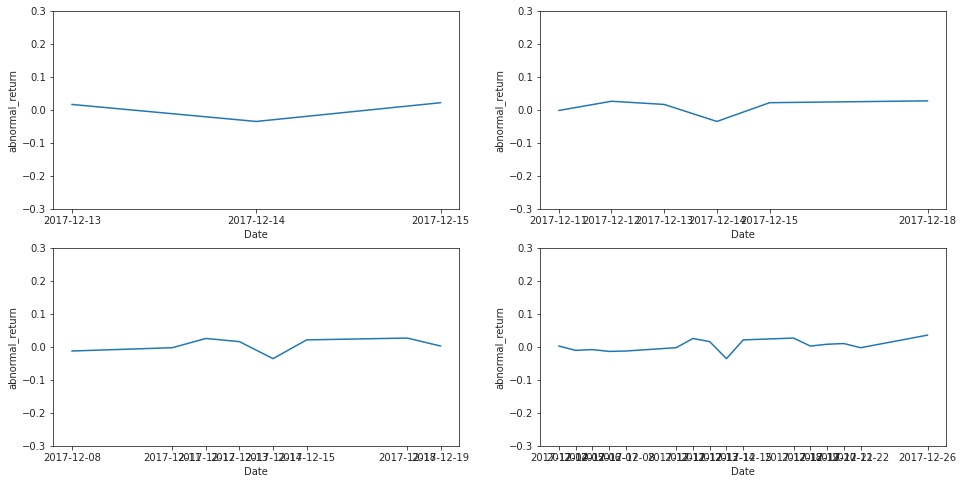

In [94]:
# Generating random samples
sample = data.iloc[np.random.randint(len(data))]
horizons = [1, 3, 5, 10]

# Getting abnormal return for specified timeframe
abnormal_returns = []
for horizon in horizons:
    if sample.acquiror_ticker in STOCKS:
        abnormal_returns.append(calculate_ar(sample.acquiror_ticker, sample.announcement_date,
                                            start=horizon, end=horizon))

fig, axes = plt.subplots(2,2, figsize=(16, 8))
i = -1
for x in range(2):
    for y in range(2):
        i += 1
        returns = abnormal_returns[i]
        print(returns.index)
        g = sns.lineplot(data=returns,ax=axes[x][y])
        g.set(ylim=(-0.3, 0.3))
        g.set_xticks(returns.index)
        #g.set_xticklabels([-1, 1][-3, 3], [-5, 5], [-10, 10])
        
        """returns.plot(ylim=(-0.02, 0.02),
                     title=f'car_{horizons[i]}',
                     ax=axes[x][y]);"""

In [ ]:
# Generating random samples
sample = data.iloc[np.random.randint(len(data))]
horizons = [1, 3, 5, 10]

# Getting abnormal return for specified timeframe
abnormal_returns = []
for horizon in horizons:
    if sample.acquiror_ticker in STOCKS:
        abnormal_returns.append(calculate_ar(sample.acquiror_ticker, sample.announcement_date,
                                            start=horizon, end=horizon))

fig, axes = plt.subplots(2,2, figsize=(16, 8))
i = -1
for x in range(2):
    for y in range(2):
        i += 1
        returns = abnormal_returns[i]
        returns.plot(ylim=(-0.3, 0.3),
                     title=f'car_{horizons[i]}',
                     ax=axes[x][y]);

In [ ]:
data_all

In [ ]:
data_all.columns

In [ ]:
data_economic

In [96]:
data_economic = data_car.groupby('acquiror_code')['car_1'].mean()
data_economic = pd.DataFrame(data_economic)
data_economic = data_economic.reset_index()
data_economic

,acquiror_code,car_1
0,50101010,0.005421
1,50102010,-0.010023
2,50102020,0.006015
3,50102030,0.008283
4,50103010,0.001734
...,...,...
126,60102020,0.001434
127,60102030,-0.000026
128,60102040,-0.004026
129,63101010,0.032851


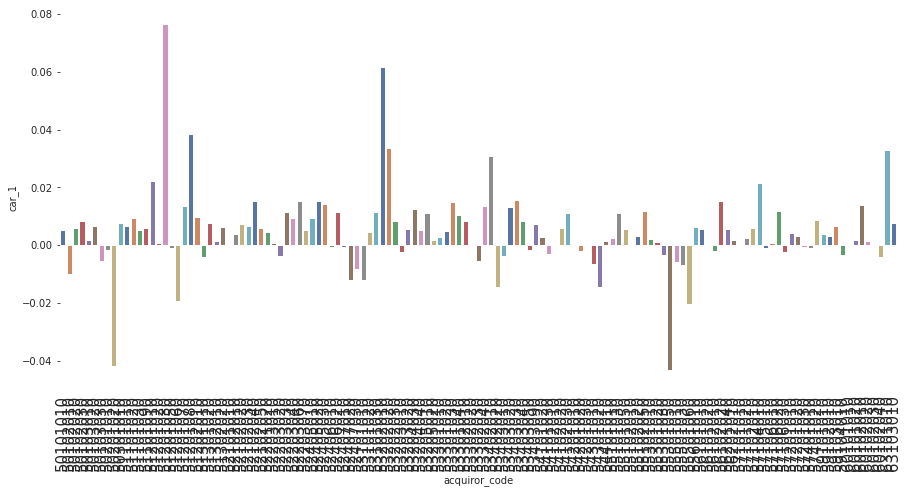

In [97]:
plt.figure(figsize=(15,7))
plt.xticks(fontsize=15, rotation=90)
sns.set_style("ticks")
ax = sns.barplot(data=data_economic,x='acquiror_code', y='car_1', color='green', palette="deep")
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')

In [72]:
data_economic_10 = data_car.groupby('economic_sector_ac')['car_10'].mean()
data_economic_10 = pd.DataFrame(data_economic)
data_economic_10 = data_economic.reset_index()
data_economic_10

KeyError: 'economic_sector_ac'

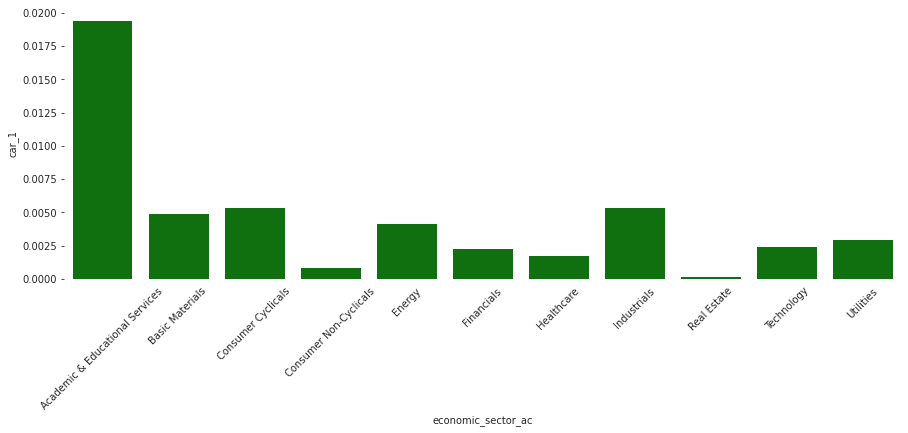

In [55]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
sns.set_style("ticks")
ax = sns.barplot(data=data_economic,x='economic_sector_ac', y='car_1', color='green')
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')

In [56]:
data_business = data_car.groupby('business_sector_ac')['car_1'].mean()
data_business = pd.DataFrame(data_business)
data_business = data_business.reset_index()
data_business

,business_sector_ac,car_1
0,Academic & Educational Services,0.019472
1,Applied Resources,0.002734
2,Automobiles & Auto Parts,0.002922
3,Banking & Investment Services,0.003301
4,Chemicals,0.006878
5,Collective Investments,-0.006967
6,Consumer Goods Conglomerates,0.001440
7,Cyclical Consumer Products,0.008149
8,Cyclical Consumer Services,0.006182
9,Energy - Fossil Fuels,0.004808


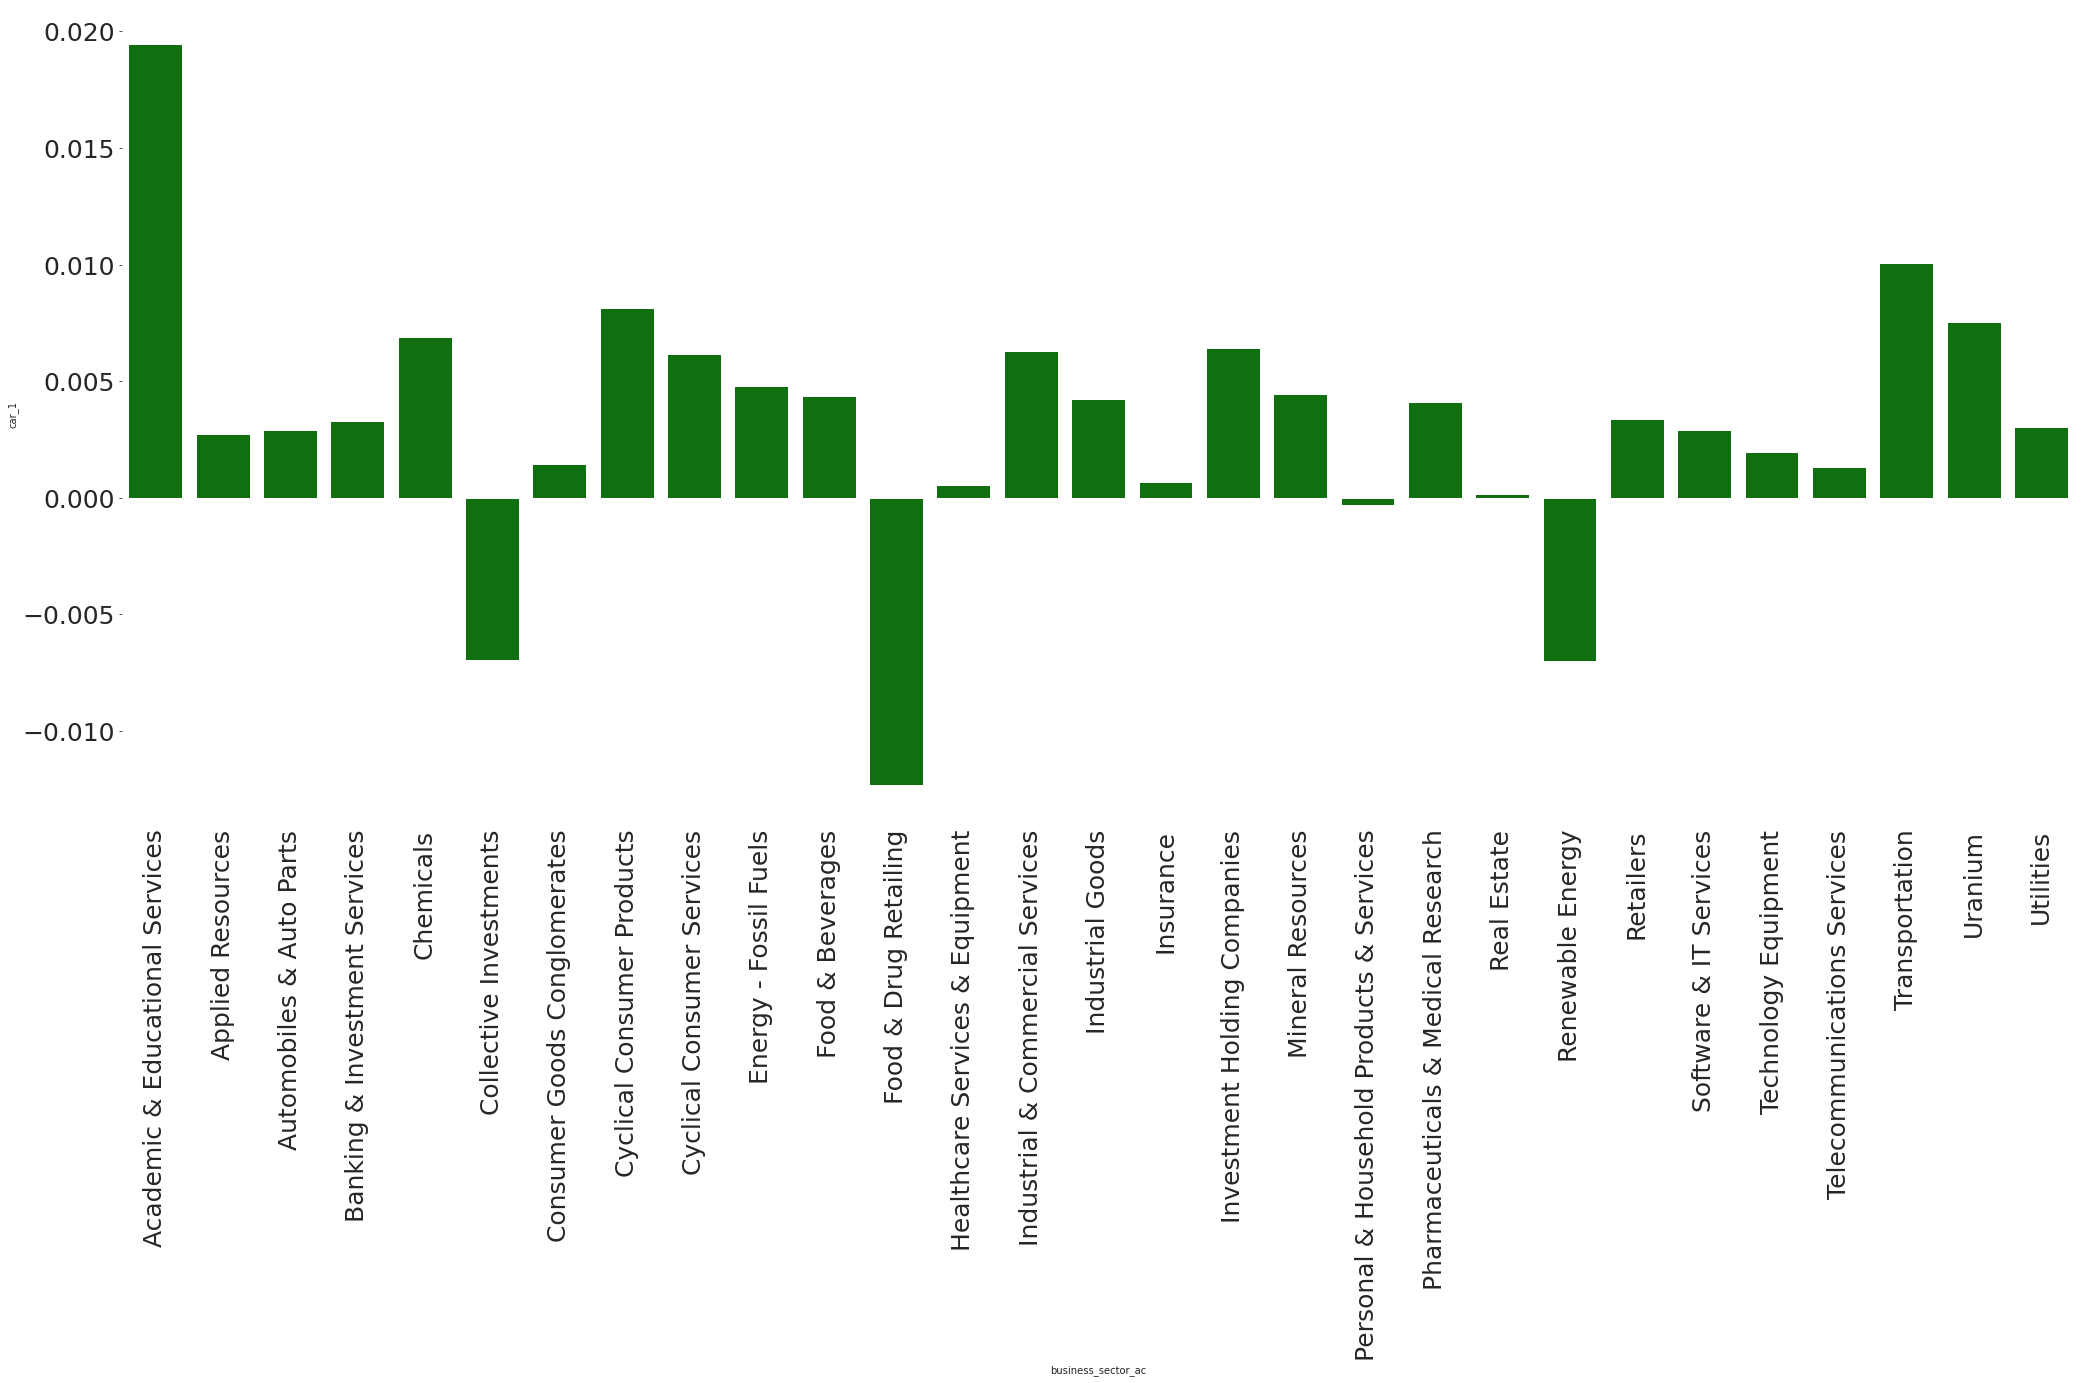

In [57]:
plt.figure(figsize=(35,15))
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
sns.set_style("ticks")
ax = sns.barplot(data=data_business,x='business_sector_ac', y='car_1', color='green')
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')

In [58]:
data_business_10 = data_car.groupby('business_sector_ac')['car_10'].mean()
data_business_10 = pd.DataFrame(data_business_10)
data_business_10 = data_business_10.reset_index()
data_business_10

,business_sector_ac,car_10
0,Academic & Educational Services,0.006371
1,Applied Resources,0.008621
2,Automobiles & Auto Parts,-0.004879
3,Banking & Investment Services,0.006186
4,Chemicals,0.007902
5,Collective Investments,0.003319
6,Consumer Goods Conglomerates,0.003020
7,Cyclical Consumer Products,0.016913
8,Cyclical Consumer Services,0.000209
9,Energy - Fossil Fuels,0.015587


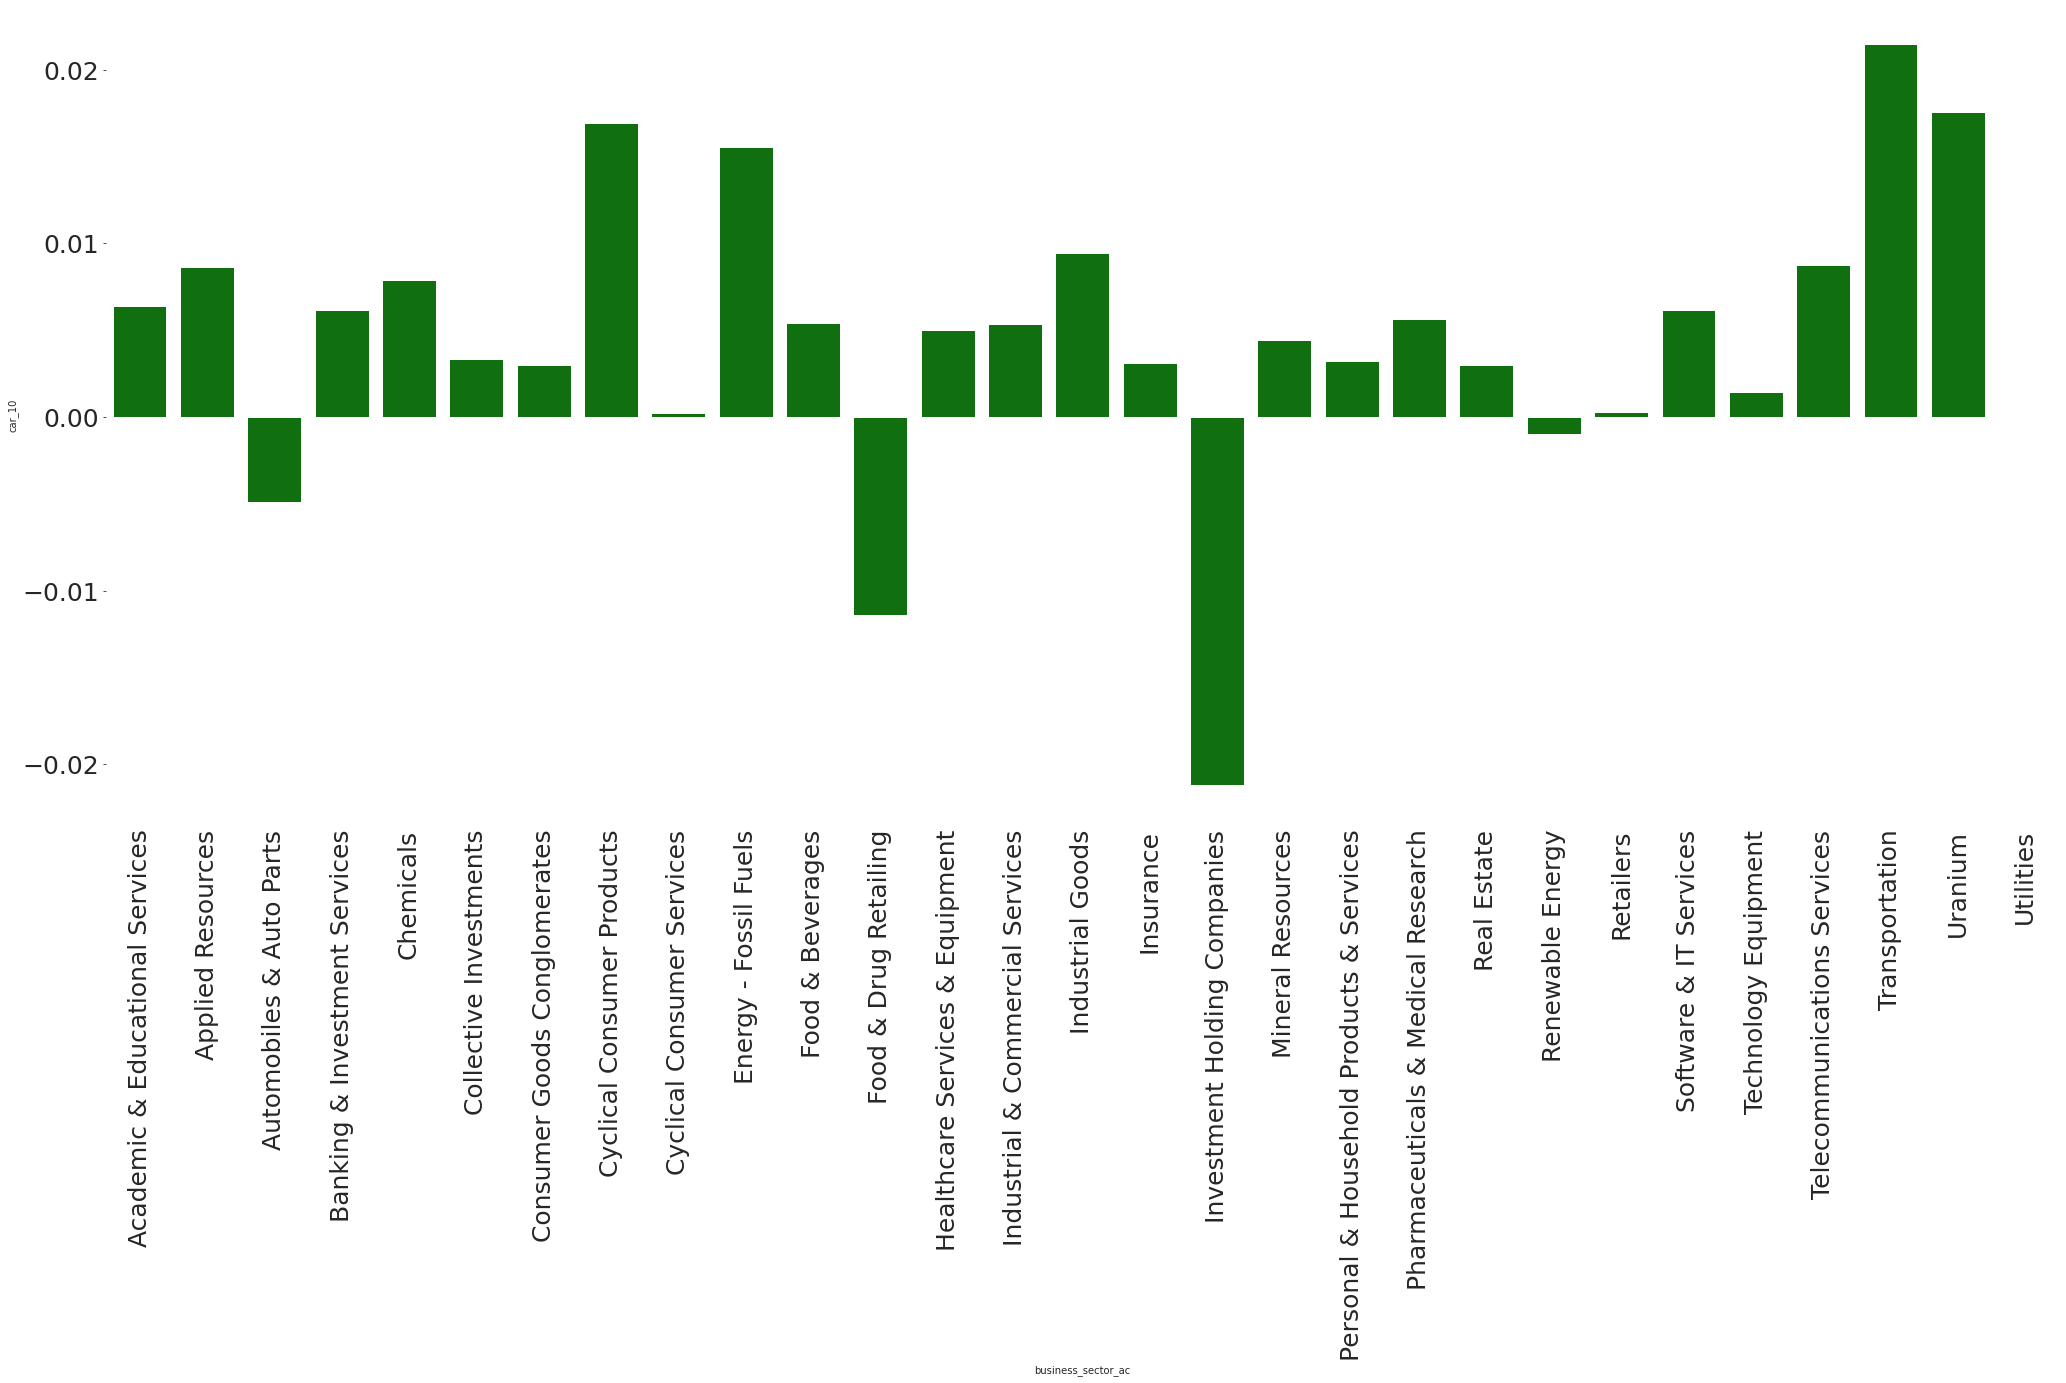

In [59]:
plt.figure(figsize=(35,15))
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
sns.set_style("ticks")
ax = sns.barplot(data=data_business_10,x='business_sector_ac', y='car_10', color='green')
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')

In [60]:
data_car.columns

Index(['consideration_offered', 'shares_acquired', 'shares_at_announcement',
       'acquiror_code', 'target_code', 'target_status', 'acquisition_count',
       'bidder_count', 'month', 'cross_border', 'relatedness',
       'economic_sector_ac', 'business_sector_ac', 'economic_sector_target',
       'business_sector_target', 'car_1', 'car_3', 'car_5', 'car_10'],
      dtype='object')

In [61]:
data_category = data_car.groupby('cluster_category')['car_1'].mean()
data_category = pd.DataFrame(data_category)
data_category = data_category.reset_index()
data_category

KeyError: 'cluster_category'

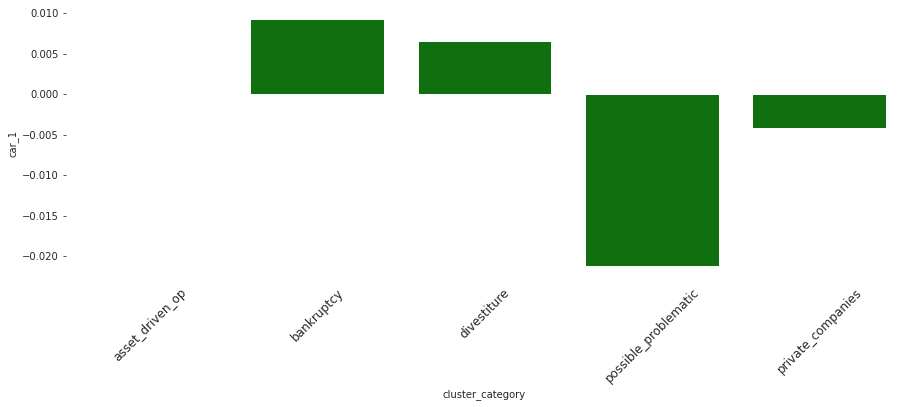

In [39]:
plt.figure(figsize=(15,5))
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=10)
sns.set_style("ticks")
ax = sns.barplot(data=data_category,x='cluster_category', y='car_1', color='green')
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')

In [40]:
data_category_10 = data_car.groupby('cluster_category')['car_10'].mean()
data_category_10 = pd.DataFrame(data_category_10)
data_category_10 = data_category_10.reset_index()
data_category_10

,cluster_category,car_10
0,asset_driven_op,0.001190
1,bankruptcy,0.004782
2,divestiture,0.008834
3,possible_problematic,0.004910
4,private_companies,-0.003392


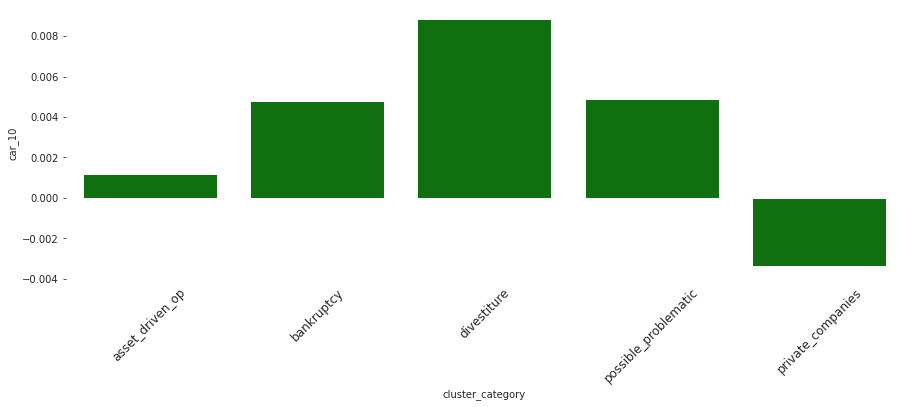

In [41]:
plt.figure(figsize=(15,5))
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=10)
sns.set_style("ticks")
ax = sns.barplot(data=data_category_10,x='cluster_category', y='car_10', color='green')
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')

In [42]:
data_car[data_car['cluster_category'] == 'Unknown'].drop

<bound method DataFrame.drop of Empty DataFrame
Columns: [announcement_date, target_status, acquisition_count, shares_at_announcement, shares_acquired, consideration_offered, bidder_count, month, rel_deal_value, cross_border, relatedness, economic_sector_ac, business_sector_ac, economic_sector_target, business_sector_target, cluster_category, a_fin_adv_count, t_fin_adv_count, car_1, car_3, car_5, car_10]
Index: []

[0 rows x 22 columns]>

In [ ]:
take car out of feature engeeniring
talk more about the ingenered features
give a known example of a merger
present app and teel a story using a couple of features

In [73]:
data_car[data_car['acquiror_code'] == 'Technology']

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,target_financial_advisor,purpose,acquiror_code,target_code,acquisition_count,bidder_count,car_1,car_3,car_5,car_10


In [ ]:
more plots. count by economic and bussines